In [1]:
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from astropy.modeling import models
from tqdm.notebook import tqdm

In [3]:
dim = 128

def fil(fil_num, noise_num):
    """
    Creates synthetic images. 
    Uses off-centre rings with large radii to model the filaments and blobs of gaussian noise for the background.
    
    """
    
    
    im = np.zeros((dim, dim))
    x, y = np.meshgrid(range(-im.shape[0]//2, im.shape[0]//2), range(-im.shape[1]//2, im.shape[1]//2))
    
    m = 0
    num_fils = abs(np.random.normal(1, scale=1))*fil_num
    while m < num_fils:        
        r = abs(np.random.normal(2000, scale=200))
        offset_x = np.random.randint(-(r+dim//2),r+dim//2)
        offset_y = np.sqrt(abs(r**2-offset_x**2))*(-1)**np.random.randint(0,2)
         
        p = 0
        while p < abs(np.random.normal(0, scale=2))+1:   #creates a random sub-fillament structure
            allign_factor = np.random.normal(0, scale=60)
            w = abs(np.random.normal(10, scale=10))+1
            b = models.Ring2D(amplitude=10, x_0=offset_x+p*allign_factor, y_0=offset_y+p*allign_factor, r_in=r, width=w)
            im += b(x, y)            
            p+=1
        m+=1

    
    n=0
    num_blobs = abs(np.random.normal(3, scale=4))*noise_num
    while n< num_blobs:
        center_x = np.random.randint(-500,500)
        center_y = np.random.randint(-500,500)
        r_x = np.random.normal(300, scale=50)
        r_y = np.random.normal(r_x, scale=10)
        
        b = models.Gaussian2D(amplitude=10, x_mean = center_x, y_mean = center_y,  x_stddev = r_x, y_stddev= r_y )
        im += b(x, y)      
        
        n+=1

    return im

In [4]:
n = 24

def show_images(images, num=n):
    """
    Visualise n=24 images
    """
    cols = 6
    rows = (num+cols-1)//cols
    plt.figure(figsize=(n,3*rows))
    for i in range(num):
        ax = plt.subplot(rows, cols, i+1)
        image = images[i]
        plt.imshow(image, cmap='inferno')
        plt.axis('off')
    plt.show()

In [3]:
#saves 20,000 filaments and 20,000 noise images to a 3d array

n = 20000

filaments = np.empty((n, dim, dim))
not_filaments = np.empty((n, dim, dim))

pbar = tqdm(total=len(filaments))

for i in range(n):
    filaments[i] = fil(0.5, 1)
    not_filaments[i] = fil(0, 1)
    pbar.update(1)
    

100%|█████████▉| 19992/20000 [02:51<00:00, 112.50it/s]

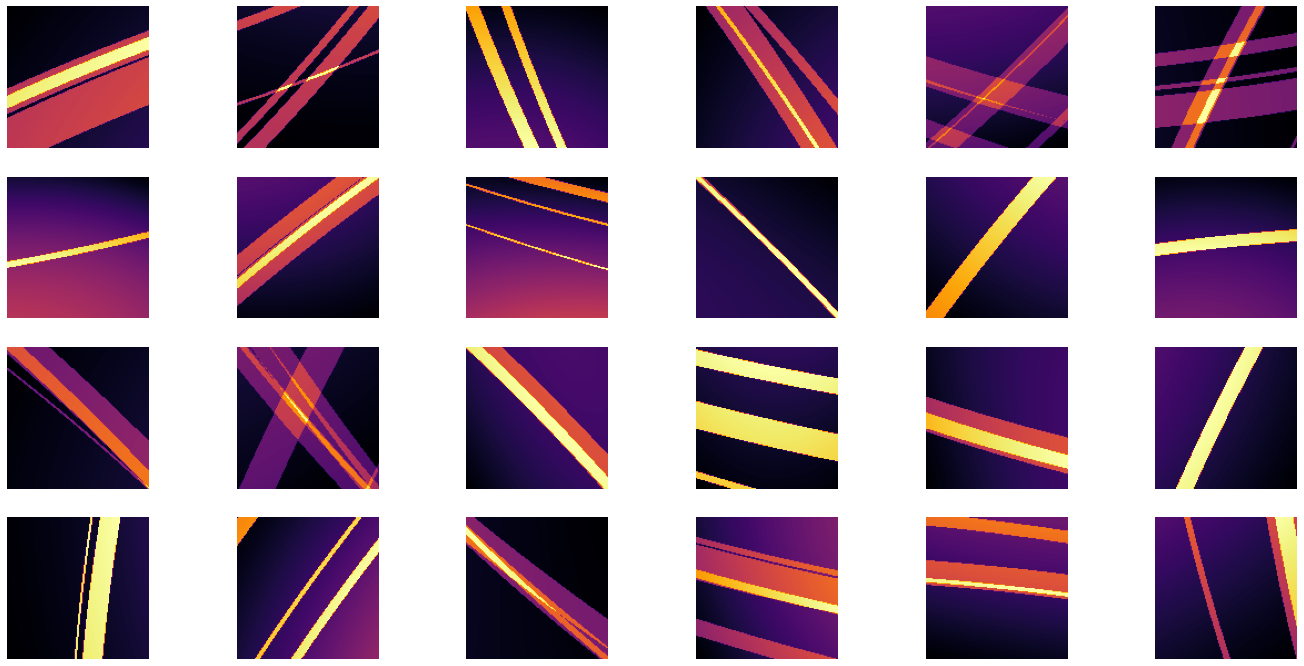

In [5]:
show_images(filaments)

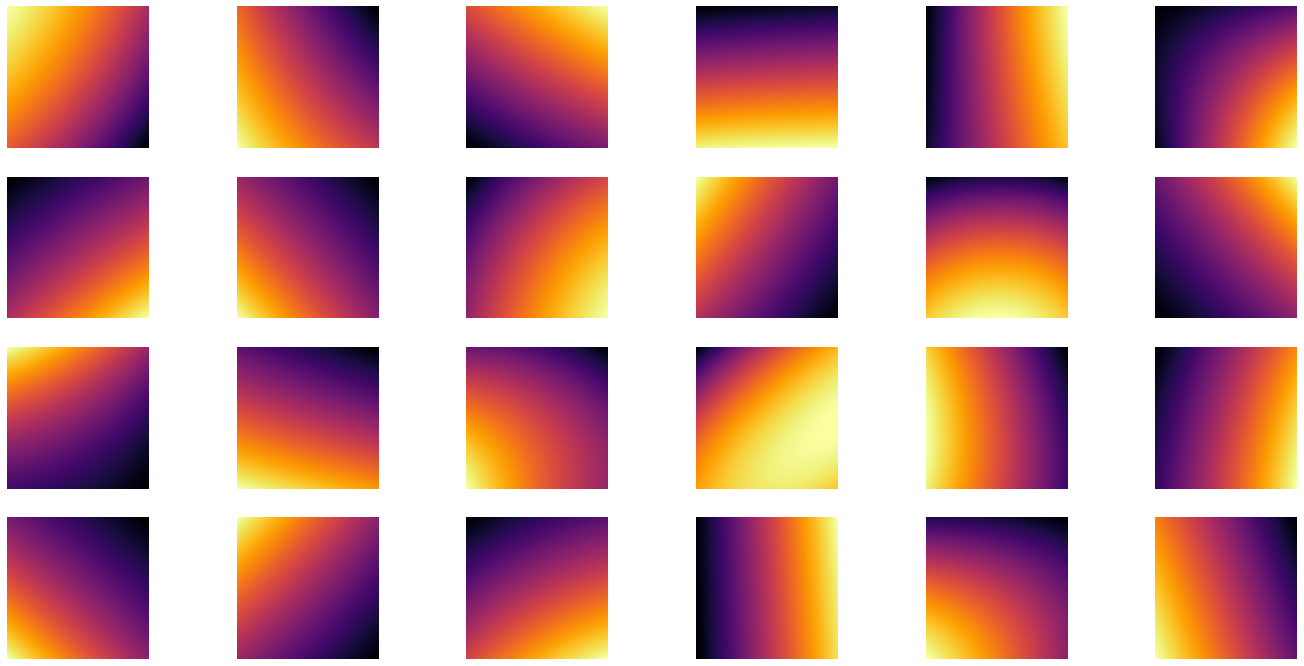

In [6]:
show_images(not_filaments)

In [7]:
np.save(r'Data arrays\sim_filaments.npy', filaments)
#np.save(r'Data arrays\sim_notfilaments.npy', not_filaments)

100%|██████████| 20000/20000 [03:10<00:00, 112.50it/s]